<a href="https://colab.research.google.com/github/Navanithapatel/AD/blob/main/pythonday17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
df=sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.rename({'sex':'Gender'},axis=1,inplace=True)

In [5]:
df.isnull().sum()

,0
total_bill,0
tip,0
Gender,0
smoker,0
day,0
time,0
size,0


In [6]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [26]:
df['smoker']=lb.fit_transform(df['smoker'])
df['Gender']=lb.fit_transform(df['Gender'])
df['time']=lb.fit_transform(df['time'])
df['day']=lb.fit_transform(df['day'])

In [27]:
df.dtypes

,0
total_bill,float64
tip,float64
Gender,int64
smoker,int64
day,int64
time,int64
size,int64
Genderr,int64


In [28]:
df.corr()#correlation matrix

,total_bill,tip,Gender,smoker,day,time,size,Genderr
total_bill,1.000000,0.675734,0.144877,0.085721,-0.043550,-0.183118,0.598315,0.144877
tip,0.675734,1.000000,0.088862,0.005929,-0.011548,-0.121629,0.489299,0.088862
Gender,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195,1.000000
smoker,0.085721,0.005929,0.002816,1.000000,-0.282721,-0.054921,-0.133178,0.002816
day,-0.043550,-0.011548,-0.078292,-0.282721,1.000000,0.638019,0.069510,-0.078292
time,-0.183118,-0.121629,-0.205231,-0.054921,0.638019,1.000000,-0.103411,-0.205231
size,0.598315,0.489299,0.086195,-0.133178,0.069510,-0.103411,1.000000,0.086195
Genderr,0.144877,0.088862,1.000000,0.002816,-0.078292,-0.205231,0.086195,1.000000


<Axes: >

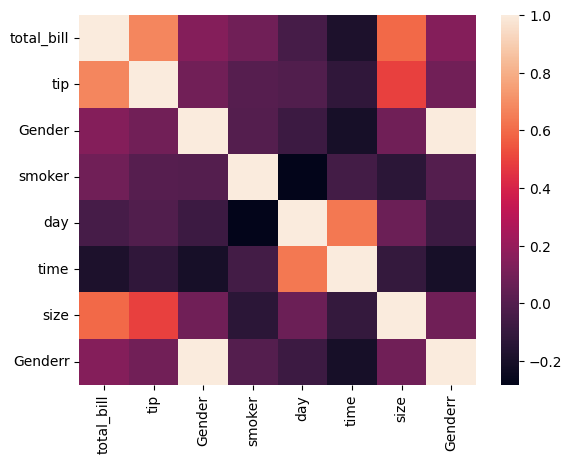

In [13]:
sns.heatmap(df.corr())

<Axes: >

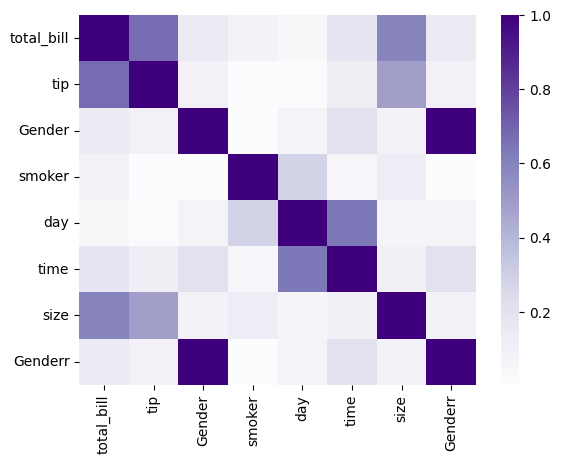

In [17]:
sns.heatmap(np.abs(df.corr()),cmap='Purples')

In [20]:
import matplotlib.pyplot as plt

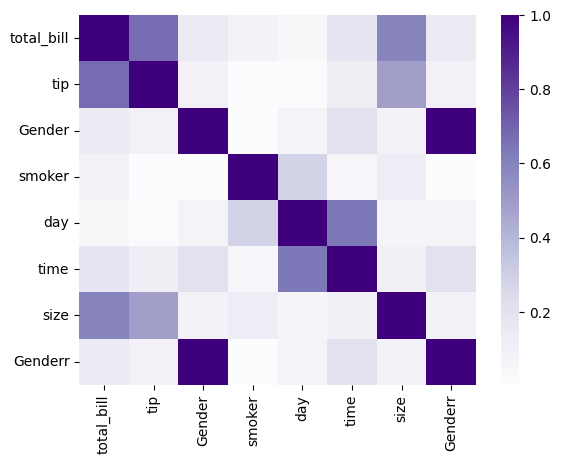

In [24]:
sns.heatmap(np.abs(df.corr()),cmap='Purples')
plt.show()

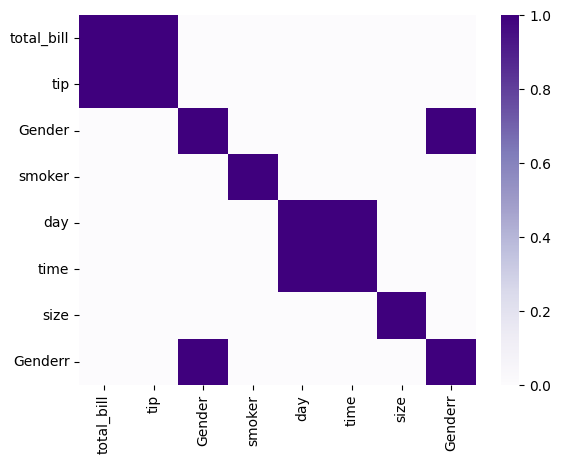

In [29]:
sns.heatmap(np.abs(df.corr())>0.6,cmap='Purples')
plt.show()

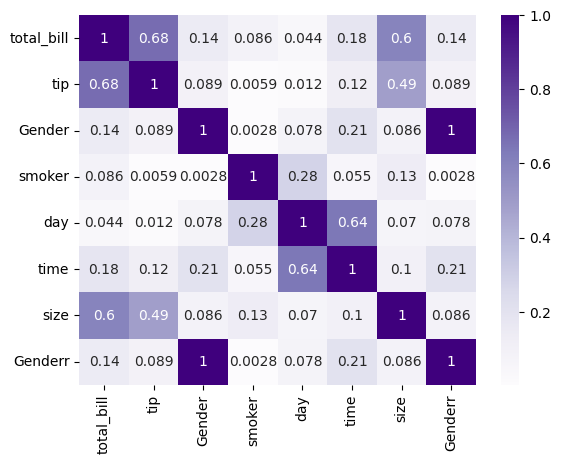

In [31]:
sns.heatmap(np.abs(df.corr()),cmap='Purples',annot=True)
plt.show()

In [ ]:
Scaling techniques
1) standardization  --->   mean 0 and std of 1

2) Normalization  ---> range of 0 to 1 inclusive


In [32]:
df.describe()

,total_bill,tip,Gender,smoker,day,time,size,Genderr
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672,0.643443
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100,0.479967
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000,1.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000,1.000000


In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [39]:
scale_df=scaler.fit_transform(df)

In [40]:
scale_df.shape

(244, 8)

In [47]:
scale_df=pd.DataFrame(scale_df,columns=df.columns)
scale_df

,total_bill,tip,Gender,smoker,day,time,size,Genderr
0,-0.314711,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193,-1.343353
1,-1.063235,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383,0.744406
2,0.137780,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383,0.744406
3,0.438315,0.225754,0.744406,-0.784789,0.279158,-0.621582,-0.600193,0.744406
4,0.540745,0.443020,-1.343353,-0.784789,0.279158,-0.621582,1.506958,-1.343353
...,...,...,...,...,...,...,...,...
239,1.040511,2.115963,0.744406,-0.784789,-0.802024,-0.621582,0.453383,0.744406
240,0.832275,-0.722971,-1.343353,1.274228,-0.802024,-0.621582,-0.600193,-1.343353
241,0.324630,-0.722971,0.744406,1.274228,-0.802024,-0.621582,-0.600193,0.744406
242,-0.221287,-0.904026,0.744406,-0.784789,-0.802024,-0.621582,-0.600193,0.744406


In [48]:
df.describe()

,total_bill,tip,Gender,smoker,day,time,size,Genderr
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.741803,0.278689,2.569672,0.643443
std,8.902412,1.383638,0.479967,0.486667,0.926815,0.449276,0.951100,0.479967
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.347500,2.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,17.795000,2.900000,1.000000,0.000000,2.000000,0.000000,2.000000,1.000000
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000,1.000000
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000,1.000000
